In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp

In [54]:
data=pd.read_csv("/content/CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [56]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [57]:
data.loc[:,["doornumber","carbody"]].value_counts()

doornumber  carbody    
four        sedan          80
two         hatchback      60
four        wagon          25
two         sedan          16
four        hatchback      10
two         hardtop         8
            convertible     6
dtype: int64

In [58]:
x=data.iloc[:,1:-1]
y=data.iloc[:,-1].values
y.dtype

dtype('float64')

In [59]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
# x= ss.fit_transform(x)

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in range(23):
  X= x.iloc[:,i]
  if(X.dtype=='object'):
    X=le.fit_transform(X)

  else:
    X = np.expand_dims(X, axis=1)
    X=ss.fit_transform(X)
  x.iloc[:,i]=X

x


# x.loc[:,['CarName',	'fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'fuelsystem', 'enginetype', 'cylindernumber']] = ohe.fit_transform(x.loc[:,['CarName',	'fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'fuelsystem', 'enginetype', 'cylindernumber']] )
# x=ohe.fit_transform

<ipython-input-59-ca8b095b161e>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:,i]=X
<ipython-input-59-ca8b095b161e>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:,i]=X
<ipython-input-59-ca8b095b161e>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:,i]=X
<ipython-input-59-ca8b095b161e>

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.743470,2,1,0,1,0,2,0,-1.690772,-0.426521,...,2,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,27
1,1.743470,3,1,0,1,0,2,0,-1.690772,-0.426521,...,2,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,27
2,0.133509,1,1,0,1,2,2,0,-0.708596,-0.231513,...,3,0.604046,5,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,26
3,0.938490,4,1,0,0,3,1,0,0.173698,0.207256,...,2,-0.431076,5,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,30
4,0.938490,5,1,0,0,3,0,0,0.107110,0.207256,...,1,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,139,1,0,0,3,2,0,1.721873,1.198549,...,2,0.339248,5,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,28
201,-1.476452,138,1,1,0,3,2,0,1.721873,1.198549,...,2,0.339248,5,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,25
202,-1.476452,140,1,0,0,3,2,0,1.721873,1.198549,...,3,1.109571,5,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,23
203,-1.476452,142,0,1,0,3,2,0,1.721873,1.198549,...,3,0.435538,3,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,27


In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [61]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(x_train,y_train)

LinearRegression()

In [65]:
y_pred=classifier.predict(x_test)
print(len(y_pred))
y_test

41


array([ 6795. , 15750. , 15250. ,  5151. ,  9995. , 11199. ,  5389. ,
        7898. , 17199. ,  6529. , 20970. , 31400.5, 10945. , 18344. ,
        8916.5,  9989. ,  9295. , 18920. ,  7895. ,  6488. ,  9959. ,
       15580. ,  9895. , 11549. , 15998. ,  5118. ,  6938. , 16695. ,
        8358. ,  5499. ,  7975. , 12290. , 22018. ,  8948. ,  6849. ,
       41315. , 11595. , 18150. ,  6377. , 45400. ,  8916.5])

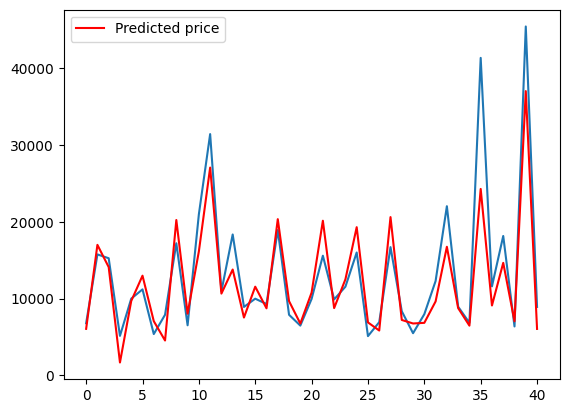

In [79]:
from re import U
from numpy.core.function_base import linspace
u = np.arange(0, 41)
len(u)
mtp.plot(u,y_test)
mtp.plot(u,y_pred,color='red',label='Predicted price')
mtp.legend()

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8113230018091989